### To display all the output in each cell instead of just the statement, run these two lines
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"  #

Use the star operator * to unpack a sequence.

In [ ]:
print("The following are the columns: ", *df.columns, sep="   ")

## pd.describe
Pandas `describe` function will give a quick statistic summary of the dataset. 

It give a good summary of the numerical variables of the dataframe including, the count, the mean, the standard deviation, the minimum and maximum values, the median etc.

`50%` is the median value which is where half the values are above this and half the values are below. The median is the average of the 2 middle values in the dataset taking in order of magnitude.
`25%` is similar in that it shows the value of which 25% of the values are below this.  It is like taking the median of the bottom half of the dataset if ordered by magnitude. 
`75%` is similar idea - like the median of the top half of the dataset. 
The mean value is the average value in the dataset but it may not be typical of the values in the dataset, as it is could be the average over very small or very large values. 
The median is more like a typical value in the dataset or closer to some of the typical values. 
Look to see if the mean and median are similar or are much different from each other.
If the median and mean are similar then the dataset is probably more balanced. 

## part 3

# i am just copying over some of section 3 before I delete it out in case I need it!

More male than female bill-payers overall. Where there are male bill payers with smokers in the party, the total bill size is more variable whereas male non-smokers total bills are clustered in the low-mid price bill range. There are no high total bills for female non-smokers.


First I will look at the difference in total bill and tip amounts when the sex of the bill payer is taken into account.
As the output from the `describe` function can get quite large when using cross-tabulation so I will limit the output of the percentiles to just the median value. The percentiles can be seen on the plots.

Pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine) function allows you to aggregate by more than one statistic so in this way I can specify the actual statistics I want to see.
I will also look at using pivot tables here and then do some seaborn plots.

seaborn.axisgrid.FacetGrid

In [14]:
# groupby sex, include only 50th percentile, round 
print(df.groupby(["sex"]).describe(percentiles=[.5]).round(2))


       total_bill                                     tip                   \
            count   mean   std   min    50%    max  count  mean   std  min   
sex                                                                          
Female       87.0  18.06  8.01  3.07  16.40  44.30   87.0  2.83  1.16  1.0   
Male        157.0  20.74  9.25  7.25  18.35  50.81  157.0  3.09  1.49  1.0   

                     size                             
         50%   max  count  mean   std  min  50%  max  
sex                                                   
Female  2.75   6.5   87.0  2.46  0.94  1.0  2.0  6.0  
Male    3.00  10.0  157.0  2.63  0.96  1.0  2.0  6.0  


In [34]:
grouped=df.groupby(['sex'])
grouped.agg([np.mean, np.std, np.sum]).round(2)

total_bill                  tip                size            big_tip  \
             mean   std      sum  mean   std     sum  mean   std  sum    mean   
sex                                                                             
Female      18.06  8.01  1570.95  2.83  1.16  246.51  2.46  0.94  214    0.47   
Male        20.74  9.25  3256.82  3.09  1.49  485.07  2.63  0.96  413    0.43   

                   
        std   sum  
sex                
Female  0.5  41.0  
Male    0.5  68.0

In [19]:
df.groupby(['smoker']).agg([np.mean, np.std, np.sum]).round()

total_bill                tip             size          
             mean   std     sum mean  std    sum mean  std  sum
smoker                                                         
No           19.0   8.0  2897.0  3.0  1.0  452.0  3.0  1.0  403
Yes          21.0  10.0  1930.0  3.0  1.0  280.0  2.0  1.0  224

In [32]:
df.pivot_table(values='tip', index=['sex','smoker'], columns=['size'], aggfunc=np.mean)

size               1         2         3         4     5     6
sex    smoker                                                 
Female No      1.415  2.370606  2.918889  4.014286  5.14  4.60
       Yes     1.000  2.736800  3.846000  4.045000   NaN   NaN
Male   No        NaN  2.557544  3.148824  4.262632  5.00  5.85
       Yes     1.920  2.692927  4.272857  3.981111  2.50   NaN

#### Does the sex of the bill payer influnce the tip amount? 
The number of male bill payers is almost twice the number of female bill payers. 
The statistics show that the average bill amount when paid for by a female is lower at 18 dollars compared to 21 dollars when paid for by a male. The average tip amount is the same so this would imply that female bill payers pay a higher tip rate. (I will look at tip rates below).
The median bill amount is 2 dollars lower than the mean for females but 3 dollars lower than the mean for males.

When females are paying the bills there is less variability in both the bill amount and the tip amount with smaller ranges of values and smaller standard deviations.

The largest bill and tip was paid for by a male  and the smallest bill size was paid for by a female. 

It is important to remember here that while we know the sex of the bill payer we do not know the sex of the individuals in any party.

(Using the new percentage `tip_rate` variable shows that on average that female bill payers give slightly higher tip as a percentage of the total bill amount. - I have not yet added this back in)

#### Summary statistics by smoker

In [22]:
# groupby sex and include 50th percentile only
#print(df.groupby(["smoker"]).describe(percentiles=[.5]).round())

#### Does having a smoker in the party influnce the tip amount? 
When there is a smoker in the party, the mean bill amount is higher by 2 dollars but the mean tip remains the same at 3 dollars. The total bill amounts are more variable with the standard deviation higher by 2 and the range of values being wider. 
It is important to note that we only know whether there is a smoker in the party or not. There is no more information in the dataset regarding how many of the party are actually smokers or whether the bill payer was a smoker or not so of all the variables I think this would be the last variable to use to reach conclusions about tipping behavious on! 


#### By sex and smoker.

In [21]:
#pd.set_option('display.max_rows', 30)
#print(df.groupby(["sex","smoker"]).describe(percentiles=[.5]).round())

In [20]:
df.groupby(["sex","smoker"]).agg([np.mean, np.std, np.sum]).round()

total_bill                tip             size          
                    mean   std     sum mean  std    sum mean  std  sum
sex    smoker                                                         
Female No           18.0   7.0   978.0  3.0  1.0  150.0  3.0  1.0  140
       Yes          18.0   9.0   593.0  3.0  1.0   97.0  2.0  1.0   74
Male   No           20.0   9.0  1920.0  3.0  1.0  302.0  3.0  1.0  263
       Yes          22.0  10.0  1337.0  3.0  2.0  183.0  2.0  1.0  150

In [33]:
pd.set_option('display.max_rows', 30)
df.groupby(["sex","smoker","size"]).agg([np.mean, np.std]).round()

total_bill        tip      big_tip     
                         mean   std mean  std    mean  std
sex    smoker size                                        
Female No     1           9.0   2.0  1.0  1.0     0.0  1.0
              2          15.0   4.0  2.0  1.0     0.0  1.0
              3          19.0   7.0  3.0  1.0     1.0  1.0
              4          28.0   6.0  4.0  1.0     0.0  0.0
              5          30.0   NaN  5.0  NaN     1.0  NaN
              6          28.0   2.0  5.0  1.0     0.0  1.0
       Yes    1           3.0   NaN  1.0  NaN     1.0  NaN
              2          16.0   6.0  3.0  1.0     1.0  1.0
              3          26.0  11.0  4.0  2.0     1.0  0.0
              4          37.0   9.0  4.0  1.0     0.0  0.0
Male   No     2          15.0   5.0  3.0  1.0     1.0  1.0
              3          22.0   7.0  3.0  1.0     0.0  0.0
              4          28.0   9.0  4.0  2.0     0.0  1.0
              5          31.0  14.0  5.0  0.0     0.0  1.0
              6          41.0  10.0  6.0  1.0     0.0  1.0
       Yes    1           9.0   NaN  2.0  NaN     1.0  NaN
              2          19.0   8.0  3.0  1.0     0.0  0.0
              3          30.0  13.0  4.0  3.0     1.0  1.0
              4          29.0   9.0  4.0  1.0     0.0  1.0
              5          29.0   2.0  2.0  1.0     0.0  0.0


Parties with male bill-payer and no smokers represent the largest group of bill payers at a count of 97 while parties with female bill-payers and smokers represents the smallest group of bill payers at just 33. 
Parties with a male bill-payer and that has smokers have the highest average bill amount at 22 dollars while they are also the most variable with a standard deviation of 10 with bill amounts varying from 7 to 51 dollars. 
Where the bill was paid for by a female and with no smokers in the group had the least variation in bill amount.


#### tip rate
Female smokers have the highest average tipping rate of 18% while male smokers appear to pay the standard tip rate of 15% and are the most variable tippers with the highest standard deviation of 9% with tips varying from 4 to 71 dollars.
Both male and female non-smokers are the least variable tippers with a standard deviation of 4%.

#### Looking at the size of the party.
As seen in part 2 when looking at the correlation matrix for the quatitative variables in the dataset, the size of the party is positively correlated with both the size of the total bill and with the tip amount, but the correlation with the tip amount is lower. 


In [30]:
# looking again at the correlation between the numerical variables in the tips dataset.
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [29]:
print(df.groupby(["size"]).describe(percentiles=[0.5]).round(2))

     total_bill                                      tip                    \
          count   mean   std    min    50%    max  count  mean   std   min   
size                                                                         
1           4.0   7.24  3.01   3.07   7.92  10.07    4.0  1.44  0.51  1.00   
2         156.0  16.45  6.04   5.75  15.37  40.55  156.0  2.58  0.99  1.00   
3          38.0  23.28  9.41  10.33  20.36  50.81   38.0  3.39  1.56  1.36   
4          37.0  28.61  8.61  16.49  25.89  48.33   37.0  4.14  1.64  2.00   
5           5.0  30.07  7.34  20.69  29.85  41.19    5.0  4.03  1.44  2.00   
6           4.0  34.83  9.38  27.05  32.05  48.17    4.0  5.22  1.05  4.20   

                   
       50%    max  
size               
1     1.42   1.92  
2     2.50   5.85  
3     3.29  10.00  
4     3.76   9.00  
5     5.00   5.14  
6     5.00   6.70  


Most of the dining parties are made up of two people with (156 of the 244 groups) with parties of 3 and 4 people being the next common at 38 and 27 respectively. There are only 4 lone diners in the data, 5 groups of 5 and only 6 groups of 4. The mean and median bill amounts do rise with party size as do the range of the bill and tip amount. Parties of 5 do seem to buck the trend though as the numbers do dip slightly. However there are so few parties here of 5 or more people in this study that we shouldn't really read much into this. The highest bill and tip amount was by a party of 3. 

#### Summary statistics by day of week

In [31]:
pd.set_option('display.max_columns', 50) # want to display all columns of the output
df.groupby("day").describe(percentiles=[.5]).round(2)# groupby day get mean of

total_bill                                    tip                    \
          count   mean   std   min    50%    max count  mean   std   min   
day                                                                        
Fri        19.0  17.15  8.30  5.75  15.38  40.17  19.0  2.73  1.02  1.00   
Sat        87.0  20.44  9.48  3.07  18.24  50.81  87.0  2.99  1.63  1.00   
Sun        76.0  21.41  8.83  7.25  19.63  48.17  76.0  3.26  1.23  1.01   
Thur       62.0  17.68  7.89  7.51  16.20  43.11  62.0  2.77  1.24  1.25   

                   size                             
       50%    max count  mean   std  min  50%  max  
day                                                 
Fri   3.00   4.73  19.0  2.11  0.57  1.0  2.0  4.0  
Sat   2.75  10.00  87.0  2.52  0.82  1.0  2.0  5.0  
Sun   3.15   6.50  76.0  2.84  1.01  2.0  2.0  6.0  
Thur  2.30   6.70  62.0  2.45  1.07  1.0  2.0  6.0

Looking at the statistics by day shows that Saturdays are the busiest days for this waiter with a total of 87 parties to serve followed by Sunday with 76 and Thursday at 62. Fridays seem to be very quiet for this waiter in this restaurant with only 19 parties served on Fridat's in the period.
The average bill was highest on Sundays but more variable on Saturdays. The average tip seems to be highest during the weekend with Sundays having the most generous tippers followed by Saturdays. The highest tip was paid on a Saturday and this might account for the tip being most variable on Saturdays.

Note that the tip amounts are not yet converted into percentage rates of total bill. The average tip amount shown is the average over all tip amounts and not in relation to total bill amounts.

In [122]:
# use PairGrid() to show multiple relationships between different pairings of the variables in the dataset:
# can use hue to condition on extra categorical variable 
#sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"], height=5, aspect=.8, kind="reg", hue="sex", palette=["pink","skyblue"]);


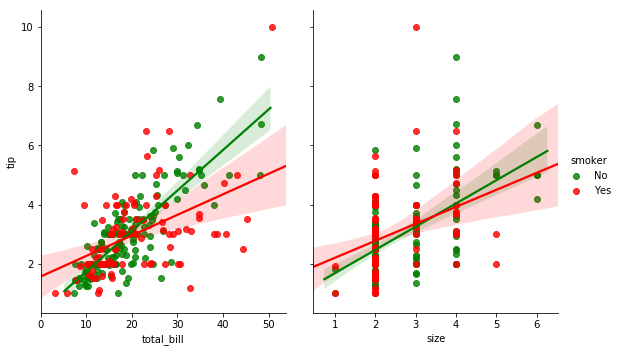

In [85]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"], height=5, aspect=.8, kind="reg", hue="smoker", palette=["g","r"]);

#### By day of week and meal

In [31]:
print(df.groupby(["day"]).describe(percentiles=[.5]).round())

     total_bill                               tip                            \
          count  mean  std  min   50%   max count mean  std  min  50%   max   
day                                                                           
Fri        19.0  17.0  8.0  6.0  15.0  40.0  19.0  3.0  1.0  1.0  3.0   5.0   
Sat        87.0  20.0  9.0  3.0  18.0  51.0  87.0  3.0  2.0  1.0  3.0  10.0   
Sun        76.0  21.0  9.0  7.0  20.0  48.0  76.0  3.0  1.0  1.0  3.0   6.0   
Thur       62.0  18.0  8.0  8.0  16.0  43.0  62.0  3.0  1.0  1.0  2.0   7.0   

      size                           
     count mean  std  min  50%  max  
day                                  
Fri   19.0  2.0  1.0  1.0  2.0  4.0  
Sat   87.0  3.0  1.0  1.0  2.0  5.0  
Sun   76.0  3.0  1.0  2.0  2.0  6.0  
Thur  62.0  2.0  1.0  1.0  2.0  6.0  


Looking at when the dining takes place, dinner on Saturday is the busiest time recorded for this waiter with 87 observations while there is only 1 bill recorded for dinner on Thursday and 7 bills for lunch on Fridays which has the smallest average bill size of 13 dollars. The total_bill amounts range from a minimum value of 3 dollars for a dinner on a Saturday (for a lone diner) to a maximum bill amount of 51 dollars for another Saturday dinner which we saw above was for a male bill payer smoker containing party! This was for a party of 3 people.


#### Total bill and tip amount
I think another variable that could be added would be the tip amount added to the total_bill amount.
I am presuming that total_bill refers to the total food and drinks bill before adding on the tip. However this is not clear in the documentation. The total food and drinks bill could possibly influence the tip amount if the bill-payer was paying by cash for the full amount or adding the tip to the debit or credit card amount. There is no information in this dataset about how the bill was paid. If paying the bill in cash, then rounding might come into play. For example in the very observation in the dataset the total_bill amount is 16.99 and the tip is 1.01 which would bring the total amount paid to 18 dollars while the second customer paid a tip of 1.66 on a 10.34 bill.



In [44]:
# df['total_paid']= df['tip'] + df['total_bill']# new columns for the total amount paid by adding tip to the total_bill amount

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,6.0
1,10.34,1.66,Male,No,Sun,Dinner,3,16.0
2,21.01,3.50,Male,No,Sun,Dinner,3,17.0
3,23.68,3.31,Male,No,Sun,Dinner,2,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4,15.0


### [Visualising Statistical Relationships in the Tips dataset](https://seaborn.pydata.org/tutorial/relational.html#visualizing-statistical-relationships)

#### [Relating variables with scatter plots](https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots)
The scatter plot is used to depict the joint distribution of two variables where each point on the scatter plot represents an observation in the dataset. For this there is either the `scatterplot` function or the figure-level version `relplot` can be used.

Here the total_bill amount is plotted on the x-axis against the tip amount on the y-axis.
Additonal variables can be shown on the same plot using the hue, size or style semantics. However using too many variables in one plot does make the plot harder to read. A better way to show relationships between multiple variables would be to use seaborns *facets* where the additional variables are used to *facet* the plot instead of taking on semantic roles. To do this you make multiple axes and plot subsets of the data on each of them.

(Note that regarding the `size` semantic, unlike matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point and instead the range of values in data units is normalized into a range in area units. )


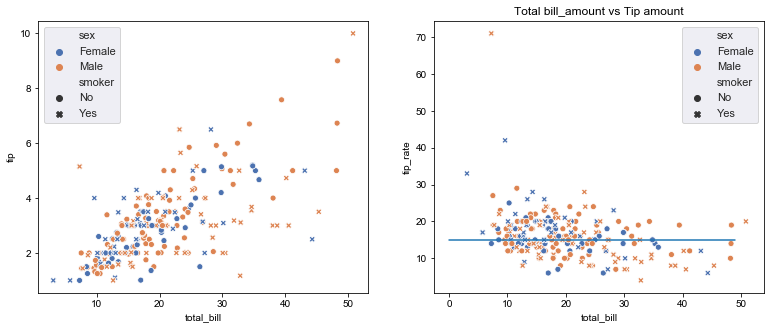

In [57]:
f, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.set(style="darkgrid") # change the background to a darkgrid

sns.scatterplot(x="total_bill", y="tip", hue="sex",style="smoker",data=df,ax=axes[0])
plt.plot(np.linspace(15, 15)) # draw a line at 15%
sns.scatterplot(x="total_bill", y="tip_rate", hue="sex",style="smoker", data=df, ax=axes[1])

plt.title("Total bill_amount vs Tip amount")
plt.show()

The scatter plot shows that there appears to be a relationship between the total bill amount and the tip. There seem to be a line going from the origin on the bottom left of the plot to the top right corner with many observations on the underside of this line. This plot shows a few higher tips for smaller bills but there are many points where the tip is smaller in comparison to the total bill size. I think the standard tipping rate in the US is 15% so maybe the trend in general is following this line. 
Most of the tips seem to be between 1 and 5 dollars and seem to be higher rates for the lower total bills. With a conventional tipping rate of 15% you would expect to see many points around the 1.50 dollar for 10 dollar bill and 3 dollars for a 20 dollar bill and so on but as the total bill size increases the tip rate does not see to rise accordingly for all points. Most total bills seem to be between 10 and 25 dollars. For total bill amounts over 30 dollars, the tip rate does not see to have a clear trend. 

I am using a second plot above to show the actual tip rate against the top meal and there is a clear cluster of points between 10 and 20% for total bill amounts between 10 and 30 dollars and although there are less higher bills the tip rates are far more variable. The horizontal line plotted at 15% is used to show the standard tip rate of 15%. There seems to be slightly more points above this 15% line but most points for the higher bills actually fall under this line which shows that while the average tip rate does seem to follow bill amount for smaller bills, the rate given for higher bills is generally lower than 15%. Also note the tips for higher bill amounts that are under the 15% line are nearly all male smokers.

There is a lot of information in this plot when the additonal variables are shown. It would be better to use facets.



### Dropping the extreme tip to focus in on other observations.
Here I am excluding the very extreme tip from the plot to prevent the majority of points being squashed into the bottom of the plot.

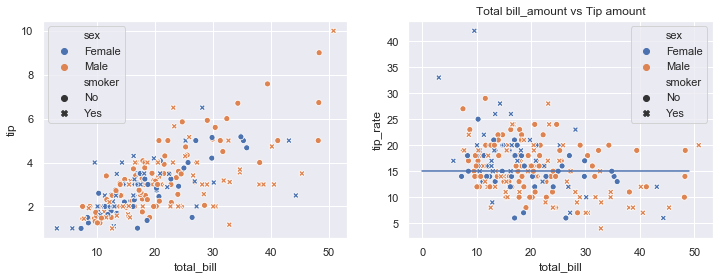

In [58]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="darkgrid") # change the background to a darkgrid

sns.scatterplot(x="total_bill", y="tip", hue="sex",style="smoker",data=df.drop(172), ax=axes[0])
sns.scatterplot(x="total_bill", y="tip_rate", hue="sex",style="smoker",data=df.drop(172), ax=axes[1])
plt.plot(np.linspace(15, 15)) # draw a line at 15%
plt.title("Total bill_amount vs Tip amount")
plt.show()

### outliers.
There is one particular observation with a very large tip rate compared to all other tips. This is causing the boxplots to be squashed down. I'm not sure how to fix this as otherwise there would be no need to transform the variable.
I will have a look at this observations here by sorting the dataframe according to the tip size.
This tip relates to row index 172 where a male paid over 5 dollars for a tip on a meal that cost just over 7 dollars!
This was for a dinner for two on a Sunday in the smoking section which is a bit unbelievable anyway at a total bill amount of 7.25! Possibly part of a bill that was already paid ?

>172        7.25  5.15    Male    Yes  Sun  Dinner     2      71.0     True

I will leave this single observation out for the box plot just here using the [drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas-dataframe-drop)

In [151]:
pd.DataFrame.drop

<function pandas.core.frame.DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')>

In [47]:
print(df.sort_values(by='tip_rate', ascending = False).head(2) )# sort by tip size and look at top 5 tip sizes

     total_bill   tip     sex smoker  day    time size  tip_rate
172        7.25  5.15    Male    Yes  Sun  Dinner    2      71.0
178        9.60  4.00  Female    Yes  Sun  Dinner    2      42.0


In [68]:
# sorting in descending order with the outlier dropped.
print(df.drop(172).sort_values(by='tip_rate', ascending = False).head(2) )# sort by tip size and look at top 5 tip sizes


     total_bill  tip     sex smoker  day    time size  tip_rate
178        9.60  4.0  Female    Yes  Sun  Dinner    2      42.0
67         3.07  1.0  Female    Yes  Sat  Dinner    1      33.0


The range of tip sizes are broadly similar each day but with higher tips paid on Sundays and more unusual behaviour on Saturdays with several outliers.
There is less variability in the tips paid by females than males with some unusually higher tips paid by males.
Dinner is more lucrative for tips.

### Summary and conclusion

I first looked at some summary statistics of the dataset by looking at the individual variables, how they were distributed. This univariate exploratory data analysis was enhanced by some visualisations which allow us to see trends in the data that might not be so obvious from tables of numbers.
I looked at the central tendancy of the total bill and tip amounts and noted that median bill is lower than the mean bill by about 2 dollars. The mean and median tip amounts differed by about 10 cent. 

(need to look at standard deviation of bill when size is taken into account).

The range of bill amounts was quite large varying from 3.07 to 50.81 dollars. The IQR range is a more robust measure of the spread of the data as it excludes the more extreme values. The boxplots are very useful here as they show the main 5 statistics visually.

The histograms show the distribution of the total bill and tip amounts and both appear to be right skewed.

Par 2 looked at some background on regression and applied this to the total bill and tip amounts. There is a correlation between total bill amount and the tip amount but the plots show the other factors at play. Size of the party was also positively correlated with the tip size.
The coefficient of determination showed that total bill amount only accounts for 46% of the variation in the tip amount.
There also appeared to be some heteroskedascity in the data when using total bill amount to predict the tip amount. 
This suggests non linearity in the dataset.

- Fridays are the quietest days for this waiter. Saturdays are the busiest days followed by Sundays so there are more customers at the weekend. 
- The mosy common party size by far is 2. There are very few lone diners and very few parties of  5 and 6.
- - Sex: There are 157 male bill payers out of 244 observations leaving only 87 female bill-payers.

- Smoker: There a more non-smokers in the dataset with 151 out of the total of 244 observations having only non-smokers in the party while 93 parties include smokers.

- Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

- Day: Saturday is the most frequent day in this dataset.

- There are almost equal numbers of male and female bill-payers on Thursdays and Fridays but the number of male bill-player far out-weighs female bill-payers at the weekend. (maybe more first dates or just more men out entertaining at the weekends!)
- There are more non-smokers than smokers on any day but especially on Thursdays and Sundays. While there are much less customers recorded for Fridays than any other days, these customers are mostly smokers. (perhaps after work?!).
- There are almost equal number of male and female bill-paying customers for lunch but far more males for dinner. There are more male paying customers overall.

Of course this dataset is just for one waiter who may work less hours on a Friday?

